In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


While searching for a data set I found one that quantifies the amount of toxic is released into different enviornments. This is a good data set because it will help findout the most safe city to live in based off of the total toxic that is released. I will be focussing on the amount of toxic in the water and findout where the best place to live is based off of that. 

Link:
https://data.wprdc.org/dataset/toxic-release-inventory/resource/c9baaa77-2dc5-494c-a2ce-f90db9106df2

In [2]:
toxic = pd.read_csv("toxic.csv")

In [3]:
toxic.head(10)

TRI_FACILITY_ID   DOC_CTRL_NUM                            FACILITY_NAME  \
0  15122SFTYK650NO  1309207547023  SAFETY-KLEEN SYSTEMS WEST MIFFLIN (WMP)   
1  15025SSCLR400ST  1307205668609                       USS-CLAIRTON PLANT   
2  15201XXNCM34THS  1394080093471            EXXON CO USA PITTSBURGH PLANT   
3  15226MTTHW1315W  1303201613510              MATTHEWS INTERNATIONAL CORP   
4  15051MRCNRSTATE  1395090491388            KINDER MORGAN TRANSMIX CO LLC   
5  15051MRCNRSTATE  1395090491388            KINDER MORGAN TRANSMIX CO LLC   
6  15017GNRLLMAYER  1301150384737           GE CO. BRIDGEVILLE GLASS PLANT   
7  15025RSTCH400ST  1389035122670           KOPPERS INC CLAIRTON TAR PLANT   
8  15025RSTCH400ST  1389035122744           KOPPERS INC CLAIRTON TAR PLANT   
9  15116BLLCH1114W  1392065371407                    RANBAR TECHNOLOGY INC   

           STREET_ADDRESS     CITY_NAME COUNTY_NAME  STATE_COUNTY_FIPS_CODE  \
0            650 NOBLE DR  WEST MIFFLIN   ALLEGHENY                   42003   
1      400 STATE ST MS 71      CLAIRTON   ALLEGHENY                   42003   
2             100 35TH ST    PITTSBURGH   ALLEGHENY                   42003   
3      1315 W LIBERTY AVE    PITTSBURGH   ALLEGHENY                   42003   
4              918 RT 910     INDIANOLA   ALLEGHENY                   42003   
5              918 RT 910     INDIANOLA   ALLEGHENY                   42003   
6            540 MAYER ST   BRIDGEVILLE   ALLEGHENY                   42003   
7          300 N STATE ST      CLAIRTON   ALLEGHENY                   42003   
8          300 N STATE ST      CLAIRTON   ALLEGHENY                   42003   
9  1114 WILLIAM FLINN HWY      GLENSHAW   ALLEGHENY                   42003   

  STATE_ABBR  ZIP_CODE  REGION  ...  RELEASE_RANGE_CODE TOTAL_RELEASE  \
0         PA     15122       3  ...                 NaN           NaN   
1         PA     15025       3  ...                 NaN     2500000.0   
2         PA     15201       3  ...                 NaN           NaN   
3         PA     15226       3  ...                 NaN           NaN   
4         PA     15051       3  ...                 NaN           7.0   
5         PA     15051       3  ...                 NaN           NaN   
6         PA     15017       3  ...                 NaN          23.0   
7         PA     15025       3  ...                 NaN           NaN   
8         PA     15025       3  ...                 NaN           0.0   
9         PA     15116       3  ...                 NaN           NaN   

   REL_EST_AMT RELEASE_NA RELEASE_BASIS_EST_CODE WATER_SEQUENCE_NUM  \
0          0.0          1                    NaN                  1   
1    2500000.0          0                     M1                  1   
2          0.0          0                    NaN                  2   
3          0.0          0                    NaN                  1   
4          7.0          0                      O                  1   
5          0.0          0                    NaN                  2   
6         23.0          0                      M                  1   
7          0.0          1                    NaN                  3   
8          0.0          0                      O                  1   
9          0.0          0                    NaN                  1   

         STREAM_NAME  STORM_WATER_NA  STORM_WATER_PERCENT REACH_CODE  
0                NaN               0                  NaN        NaN  
1  MONONGAHELA RIVER               1                  NaN        NaN  
2                NaN               0                  NaN        NaN  
3                NaN               0                  NaN        NaN  
4         DEER CREEK               1                  NaN        NaN  
5                NaN               0                  NaN        NaN  
6    CHARTIERS CREEK               0                100.0        NaN  
7                NaN               0                  NaN        NaN  
8       PETERS CREEK               0             

In [4]:
toxic["TOTAL_RELEASE"].mean()

13395.222815396719

In [5]:
n = 0
uniq = toxic['CITY_NAME'].unique()
for a in uniq:
    n = n + 1
n = str(n)
print("There are " + n + " unique cities that were recorded")

There are 48 unique cities that were recorded


In [6]:
toxicC = {}
n=0
n1=0
n2=1
for row in toxic.iterrows():
    n1 = toxic.iloc[n,4] 
    if n1 not in toxicC:
        toxicC[n1] = n2
    elif n1 in toxicC:
        toxicC[n1] = toxicC[n1] + n2
    n = n+1

toxicC

{'WEST MIFFLIN': 470,
 'CLAIRTON': 1829,
 'PITTSBURGH': 4920,
 'INDIANOLA': 353,
 'BRIDGEVILLE': 737,
 'GLENSHAW': 183,
 'LEETSDALE': 228,
 'BRACKENRIDGE': 531,
 'CARNEGIE': 228,
 'SPRINGDALE': 1371,
 'WEST ELIZABETH': 525,
 'DUQUESNE': 54,
 'CHESWICK': 75,
 'BRADDOCK': 680,
 'TURTLE CREEK': 82,
 'OAKMONT': 185,
 'MONROEVILLE': 108,
 'MUNHALL': 154,
 'MC KEESPORT': 327,
 'SOUTH PARK': 2,
 'CORAOPOLIS': 363,
 'MC KEES ROCKS': 163,
 'SEWICKLEY': 171,
 'CREIGHTON': 113,
 'VERONA': 120,
 'EAST PITTSBURGH': 36,
 'HARWICK': 314,
 'JEFFERSON HILLS': 146,
 'WILMERDING': 78,
 'BAKERSTOWN': 91,
 'OAKDALE': 124,
 'NATRONA HEIGHTS': 172,
 'HOMESTEAD': 46,
 'MC DONALD': 95,
 'HEIDELBERG': 37,
 'BUNOLA': 120,
 'GIBSONIA': 71,
 'MCKEESPORT': 33,
 'SHARPSBURG': 6,
 'TARENTUM': 3,
 'GLASSPORT': 55,
 'CLINTON': 12,
 'RANKIN': 19,
 'LIBERTY BOROUGH': 19,
 'DRAVOSBURG': 7,
 'NEVILLE ISLAND': 5,
 'MONONGAHELA': 1,
 'BLAWNOX': 10}

The most recorded city is very easily Pittsburgh which is recorded almost 5 thousand times. Where as the least recorded are places like Tarentum, Nevile Island, or Monogahela that are not even counted in the double digits. This is a huge range in the number of places recorded however because I will be taking the average later that differences importance will decrease. I would entirely take out these data points but for the sake of finding the best city I think it is necesary to use every single data point that I hae available so I will still be using these cities. At the end if these data points are outliars I will say so then and recognize this as one possible reason. 

In [7]:
import math
toxicA = {}
n=0
n1=0
n2=0
for row in toxic.iterrows():
    n1 = toxic.iloc[n,4]
    n2 = toxic.iloc[n,34]
    if math.isnan(n2):
        n2 = 0
    if n1 not in toxicA:
        toxicA[n1] = n2
    elif n1 in toxicA:
        toxicA[n1] = toxicA[n1] + n2
    n = n+1
toxicA    



{'WEST MIFFLIN': 488905.77999999997,
 'CLAIRTON': 47010225.57000003,
 'PITTSBURGH': 2453163.460000001,
 'INDIANOLA': 1537.5500000000002,
 'BRIDGEVILLE': 5168.189999999999,
 'GLENSHAW': 0.0,
 'LEETSDALE': 54784.14000000001,
 'BRACKENRIDGE': 8437507.0,
 'CARNEGIE': 812.0,
 'SPRINGDALE': 29612.1857,
 'WEST ELIZABETH': 15861.84,
 'DUQUESNE': 0.0,
 'CHESWICK': 0.0,
 'BRADDOCK': 1095193.9900000002,
 'TURTLE CREEK': 0.0,
 'OAKMONT': 524.0,
 'MONROEVILLE': 0.0,
 'MUNHALL': 0,
 'MC KEESPORT': 0.0,
 'SOUTH PARK': 0,
 'CORAOPOLIS': 1438.3000000000002,
 'MC KEES ROCKS': 0.0,
 'SEWICKLEY': 500.0,
 'CREIGHTON': 0.0,
 'VERONA': 0.0,
 'EAST PITTSBURGH': 0,
 'HARWICK': 0,
 'JEFFERSON HILLS': 2.3,
 'WILMERDING': 0.0,
 'BAKERSTOWN': 0.0,
 'OAKDALE': 0,
 'NATRONA HEIGHTS': 0,
 'HOMESTEAD': 110.0,
 'MC DONALD': 0,
 'HEIDELBERG': 0.0,
 'BUNOLA': 0.0,
 'GIBSONIA': 0,
 'MCKEESPORT': 0.0,
 'SHARPSBURG': 0,
 'TARENTUM': 0,
 'GLASSPORT': 0,
 'CLINTON': 0,
 'RANKIN': 0,
 'LIBERTY BOROUGH': 0.0,
 'DRAVOSBURG': 0.0

In [20]:
aveTox = dict((k, float(toxicA[k]) / toxicC[k]) for k in toxicC)




In [21]:
toxPlot = pd.Series(aveTox)


In [22]:
toxPlot

WEST MIFFLIN        1040.225064
CLAIRTON           25702.693040
PITTSBURGH           498.610459
INDIANOLA              4.355666
BRIDGEVILLE            7.012469
GLENSHAW               0.000000
LEETSDALE            240.281316
BRACKENRIDGE       15889.843691
CARNEGIE               3.561404
SPRINGDALE            21.598968
WEST ELIZABETH        30.213029
DUQUESNE               0.000000
CHESWICK               0.000000
BRADDOCK            1610.579397
TURTLE CREEK           0.000000
OAKMONT                2.832432
MONROEVILLE            0.000000
MUNHALL                0.000000
MC KEESPORT            0.000000
SOUTH PARK             0.000000
CORAOPOLIS             3.962259
MC KEES ROCKS          0.000000
SEWICKLEY              2.923977
CREIGHTON              0.000000
VERONA                 0.000000
EAST PITTSBURGH        0.000000
HARWICK                0.000000
JEFFERSON HILLS        0.015753
WILMERDING             0.000000
BAKERSTOWN             0.000000
OAKDALE                0.000000
NATRONA 

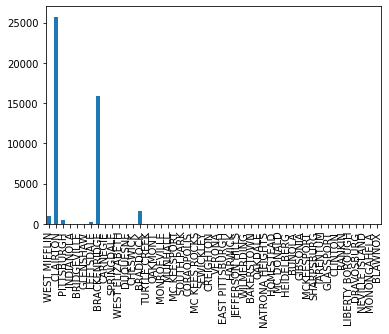

In [23]:
toxPlot.plot(kind = 'bar')

There are too many data points for this graph to be clear, because of this I will remove all the data points with 0 as the result because thats the most common result along with being the goal for this index. Therefore all those with 0 as the result are the cleanest however because of the amount of them I will now be finding the next best city

In [24]:
delete = []
for row in aveTox:
    if aveTox[row] == 0:
        delete.append(row)
for row in delete:
    del aveTox[row]

aveTox

{'WEST MIFFLIN': 1040.2250638297871,
 'CLAIRTON': 25702.693039912538,
 'PITTSBURGH': 498.61045934959367,
 'INDIANOLA': 4.355665722379604,
 'BRIDGEVILLE': 7.012469470827678,
 'LEETSDALE': 240.28131578947372,
 'BRACKENRIDGE': 15889.843691148775,
 'CARNEGIE': 3.56140350877193,
 'SPRINGDALE': 21.598968417213715,
 'WEST ELIZABETH': 30.213028571428573,
 'BRADDOCK': 1610.5793970588238,
 'OAKMONT': 2.8324324324324324,
 'CORAOPOLIS': 3.9622589531680448,
 'SEWICKLEY': 2.9239766081871346,
 'JEFFERSON HILLS': 0.015753424657534244,
 'HOMESTEAD': 2.391304347826087}

In [25]:
toxPlot2 = pd.Series(aveTox)

In [26]:
toxPlot2

WEST MIFFLIN        1040.225064
CLAIRTON           25702.693040
PITTSBURGH           498.610459
INDIANOLA              4.355666
BRIDGEVILLE            7.012469
LEETSDALE            240.281316
BRACKENRIDGE       15889.843691
CARNEGIE               3.561404
SPRINGDALE            21.598968
WEST ELIZABETH        30.213029
BRADDOCK            1610.579397
OAKMONT                2.832432
CORAOPOLIS             3.962259
SEWICKLEY              2.923977
JEFFERSON HILLS        0.015753
HOMESTEAD              2.391304
dtype: float64

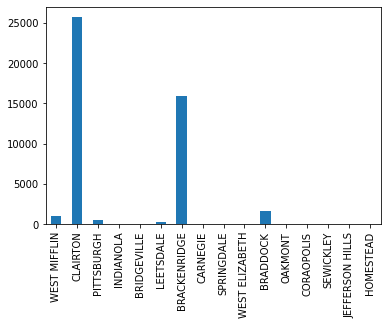

In [27]:
toxPlot2.plot(kind = 'bar')

Because of these two massive outliars its skewing the graph massively making most of the other data points look like nothing. These two data points are also the only two data points above the average therefore they are obviously not the best in the amount of toxic released

In [33]:
del aveTox['CLAIRTON']
del aveTox['BRACKENRIDGE']

In [34]:
aveTox

{'WEST MIFFLIN': 1040.2250638297871,
 'PITTSBURGH': 498.61045934959367,
 'INDIANOLA': 4.355665722379604,
 'BRIDGEVILLE': 7.012469470827678,
 'LEETSDALE': 240.28131578947372,
 'CARNEGIE': 3.56140350877193,
 'SPRINGDALE': 21.598968417213715,
 'WEST ELIZABETH': 30.213028571428573,
 'BRADDOCK': 1610.5793970588238,
 'OAKMONT': 2.8324324324324324,
 'CORAOPOLIS': 3.9622589531680448,
 'SEWICKLEY': 2.9239766081871346,
 'JEFFERSON HILLS': 0.015753424657534244,
 'HOMESTEAD': 2.391304347826087}

In [35]:
toxPlot3 = pd.Series(aveTox)

In [36]:
toxPlot3

WEST MIFFLIN       1040.225064
PITTSBURGH          498.610459
INDIANOLA             4.355666
BRIDGEVILLE           7.012469
LEETSDALE           240.281316
CARNEGIE              3.561404
SPRINGDALE           21.598968
WEST ELIZABETH       30.213029
BRADDOCK           1610.579397
OAKMONT               2.832432
CORAOPOLIS            3.962259
SEWICKLEY             2.923977
JEFFERSON HILLS       0.015753
HOMESTEAD             2.391304
dtype: float64

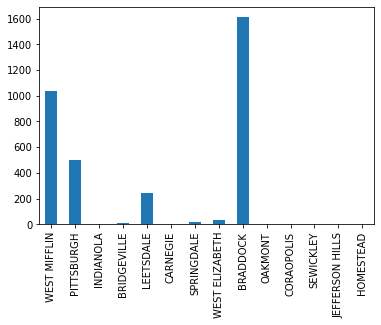

In [37]:
toxPlot3.plot(kind = 'bar')
plt.title("Toxin Released in Water Comparison")
plt.xlabel("Cities")
plt.ylabel("Total Released on ")